<a href="https://colab.research.google.com/github/Ankitp2005/MLprojects/blob/main/parkinsenDesiesDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependecies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data collection & analysis

In [ ]:
# converting csv data to pandas dataFrame
data = pd.read_csv('/content/Parkinsson disease.csv')

In [ ]:
# first five rows of dataset
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# statistical measure of dataset
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# number of rows and columns in dataset
data.shape

(195, 24)

In [ ]:
data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [ ]:
# getting more information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

distribution of target variable :
* 0 --> healthy
* 1--> parkinsen disease

In [ ]:
data['status'].value_counts()

,count
status,
1,147
0,48


In [ ]:
# grouping the data based on the target variable
data.groupby('status').mean(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Pre-processing

seperating features and target variable

In [ ]:
x = data.drop(columns=['name','status'] , axis =1)
y = data['status']

In [ ]:
x,y

(     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
 0        119.992       157.302        74.997         0.00784   
 1        122.400       148.650       113.819         0.00968   
 2        116.682       131.111       111.555         0.01050   
 3        116.676       137.871       111.366         0.00997   
 4        116.014       141.781       110.655         0.01284   
 ..           ...           ...           ...             ...   
 190      174.188       230.978        94.261         0.00459   
 191      209.516       253.017        89.488         0.00564   
 192      174.688       240.005        74.287         0.01360   
 193      198.764       396.961        74.904         0.00740   
 194      214.289       260.277        77.973         0.00567   
 
      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
 0             0.00007   0.00370   0.00554     0.01109       0.04374   
 1             0.00008   0.00465   0.00696     0.01394       0.06134   
 2

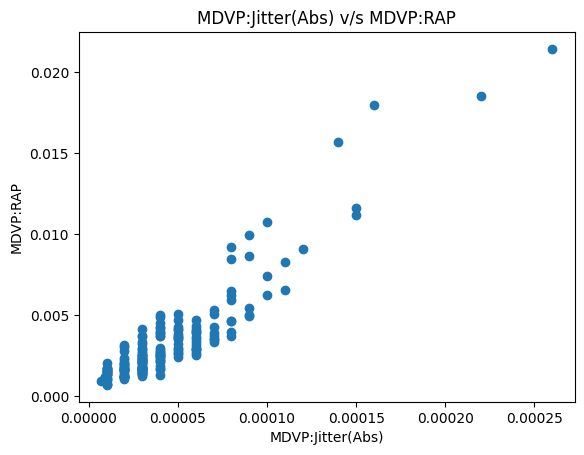

In [ ]:
plt.title('MDVP:Jitter(Abs) v/s MDVP:RAP')
plt.scatter(x['MDVP:Jitter(Abs)'], x['MDVP:RAP'])
plt.xlabel('MDVP:Jitter(Abs)')
plt.ylabel('MDVP:RAP')
plt.show()

spliting data into training and testing

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.2, random_state = 2)

In [ ]:
x.shape, x_train.shape, x_test.shape

((195, 22), (156, 22), (39, 22))

data standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x_train)

StandardScaler()

In [ ]:
scaler.transform(x_train)        # standard sclaer is used to standardized all values in a certain range of values

array([[ 0.63239631, -0.02731081, -0.87985049, ..., -0.97586547,
        -0.55160318,  0.07769494],
       [-1.05512719, -0.83337041, -0.9284778 , ...,  0.3981808 ,
        -0.61014073,  0.39291782],
       [ 0.02996187, -0.29531068, -1.12211107, ..., -0.43937044,
        -0.62849605, -0.50948408],
       ...,
       [-0.9096785 , -0.6637302 , -0.160638  , ...,  1.22001022,
        -0.47404629, -0.2159482 ],
       [-0.35977689,  0.19731822, -0.79063679, ..., -0.17896029,
        -0.47272835,  0.28181221],
       [ 1.01957066,  0.19922317, -0.61914972, ..., -0.716232  ,
         1.23632066, -0.05829386]])

In [ ]:
scaler.transform(x_test)

array([[-1.70008583e+00, -9.67968410e-01, -7.70130215e-01,
        -2.75000683e-01,  4.16156683e-01, -2.92615113e-01,
        -9.70869783e-02, -2.91621655e-01, -4.94706656e-01,
        -4.90058396e-01, -5.32488171e-01, -4.26848854e-01,
        -3.60251422e-01, -5.32484688e-01, -3.57189713e-01,
        -1.08840337e-01,  1.06963705e+00,  1.05628304e+00,
         3.72180199e-01,  1.94886208e+00,  3.66935071e-02,
         4.44314482e-01],
       [-1.39044095e+00, -9.29681132e-01, -7.37045677e-01,
         7.42068829e-01,  1.50451280e+00,  8.54349819e-01,
         7.33639862e-01,  8.53234751e-01, -3.12538562e-03,
         3.01660094e-01,  1.16511011e-01, -7.67595149e-02,
        -2.23967413e-01,  1.16829276e-01, -1.19644974e-01,
        -5.22790834e-01,  9.12650090e-01,  1.31721995e+00,
         6.70118138e-01,  4.74318608e-01,  1.42454868e-02,
         7.46859799e-01],
       [-1.35302065e+00, -6.29175292e-01, -7.29027225e-01,
         4.92094897e-01,  1.23242377e+00,  4.52288742e-01,
    

model training:

svm

In [ ]:
model = svm.SVC()

In [ ]:
# TRAINING THE svm model with training data
model.fit(x_train, y_train)

SVC()

model accuracy

In [ ]:
# accuracy score on training data
x_train_pred = model.predict(x_train)

training_data_pred = accuracy_score(y_train, x_train_pred)

In [ ]:
print('accuracy score of test data is :',training_data_pred)

accuracy score of test data is : 0.8141025641025641


In [ ]:
# accuracy score on test data
x_test_pred = model.predict(x_test)

test_data_pred = accuracy_score(y_test, x_test_pred)

In [ ]:
print('accuracy score of test data is :',test_data_pred)

accuracy score of test data is : 0.8461538461538461


Building a preictive system

In [ ]:
input_data = (120.552,131.162,113.787,0.00968,0.00008,0.00463,0.0075,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.18756,0.357775)

In [ ]:
# changing input data to numpy array
arr_data = np.array(input_data)

# reshaping the numpy array data for one instance
reshaped_data = arr_data.reshape(1,-1)

# standardized the reshaped data
std_data = scaler.transform(reshaped_data)

pred = model.predict(std_data)


if(pred[0] == 0):
  print('person is healthy')
else:
  print('person is having parkinsen desies')

person is having parkinsen desies


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
